<a href="https://colab.research.google.com/github/monanjo123/digit-recognition/blob/master/Digit_Recognition_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognition

In [0]:
# keras imports
import keras
from keras import backend as K

# load datasets
from keras.datasets import mnist

#import model type
from keras.models import Sequential

from keras.utils import np_utils
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD

import matplotlib.pyplot as plt
# for opencv to show images
from google.colab.patches import cv2_imshow
import cv2 
import numpy as np


# Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
(new_x_train, new_y_train), (new_x_test, new_y_test) = mnist.load_data()

# Using OpenCV to check image

In [19]:
for i in range(0,6):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  window_name = 'Random Sample ' + str(i)
  cv2_imshow(img)

# Using Matplotlib

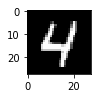

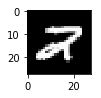

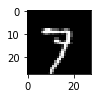

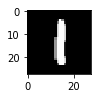

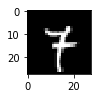

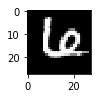

In [29]:
for i in range(0, 6):
  plt.subplot(331 + i)
  random_num = np.random.randint(0, len(x_train))
  plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
  plt.show()

# Prepare Dataset for training

In [47]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# add a 4th dimension to data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image
input_shape = (img_rows, img_cols, 1)

#change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize our data by changing the range from 0 - 255 to 0 - 1
x_train /= 255
x_test  /= 255

print(x_train.shape[0], x_test.shape[0])

60000 10000


# Clean Categorical data using One Hot Encoding

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# Create Model

In [45]:
# Create Model
model = Sequential()

model.add(Conv2D(32, 
               kernel_size=(3,3),
               activation='relu',
               input_shape=input_shape))
model.add(Conv2D(64,
                (3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,
               activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,
              activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer=SGD(0.01),
             metrics=['accuracy'])

print(model.summary())

W0825 13:59:25.134260 140351901489024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0825 13:59:25.136844 140351901489024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 13:59:25.145015 140351901489024 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0825 13:59:25.226603 140351901489024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# Train our model

In [50]:
batch_size = 32
epochs = 15

history = model.fit(x_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 19s 309us/step - loss: 0.0785 - acc: 0.9776 - val_loss: 0.0400 - val_acc: 0.9871
Epoch 2/15
60000/60000 [==============================] - 18s 305us/step - loss: 0.0718 - acc: 0.9777 - val_loss: 0.0407 - val_acc: 0.9867
Epoch 3/15
60000/60000 [==============================] - 18s 305us/step - loss: 0.0688 - acc: 0.9796 - val_loss: 0.0394 - val_acc: 0.9875
Epoch 4/15
60000/60000 [==============================] - 18s 304us/step - loss: 0.0653 - acc: 0.9798 - val_loss: 0.0369 - val_acc: 0.9875
Epoch 5/15
60000/60000 [==============================] - 18s 302us/step - loss: 0.0634 - acc: 0.9802 - val_loss: 0.0354 - val_acc: 0.9882
Epoch 6/15
60000/60000 [==============================] - 18s 304us/step - loss: 0.0573 - acc: 0.9824 - val_loss: 0.0350 - val_acc: 0.9880
Epoch 7/15
60000/60000 [==============================] - 18s 299us/step - loss: 0.0565 - acc: 0.9825 - val_loss: 0.

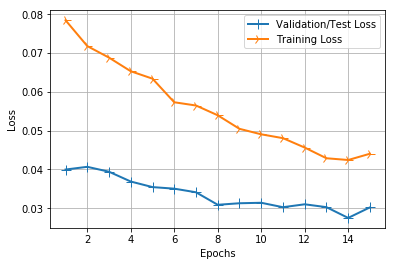

In [53]:
#Plot loss and accuracy

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

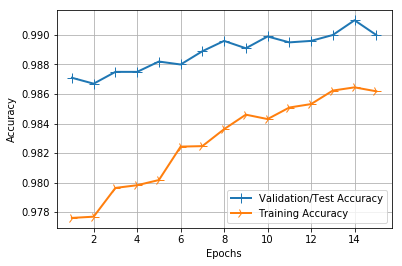

In [54]:
history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [56]:
#save model
model.save('/content/drive/My Drive/Machine Learning/handwriting_recognition.h5')
print('model saved')

model saved


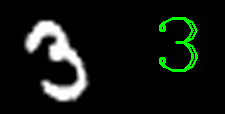

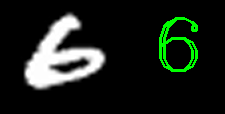

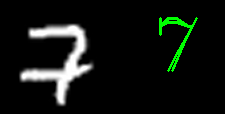

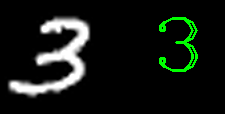

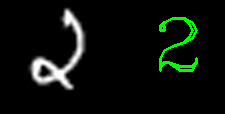

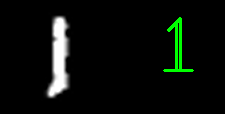

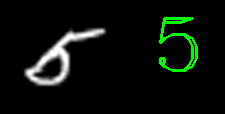

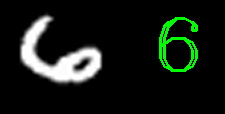

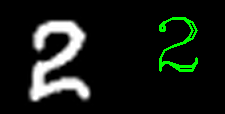

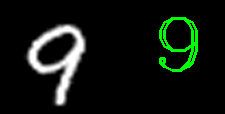

In [82]:
from keras.models import load_model

classifier = load_model('/content/drive/My Drive/Machine Learning/handwriting_recognition.h5')

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 1, 1, 1, input_im.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2_imshow(expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(new_x_test[rand], None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)

    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)


In [0]:
from keras.utils.vis_utils import plot_model
# Save our model diagrams to this path
model_diagrams_path = '/content/drive/My Drive/Machine Learning/'

# Generate the plot
plot_model(model, to_file = model_diagrams_path + 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)




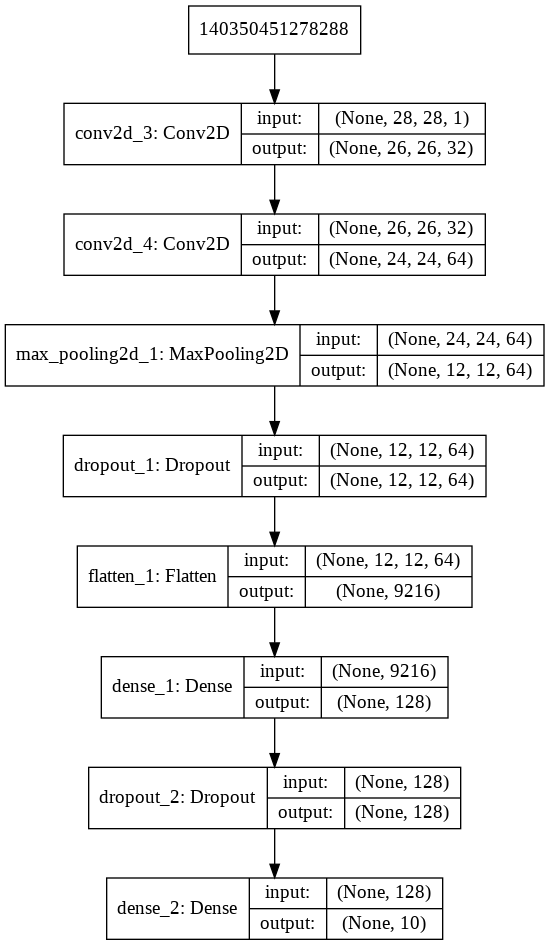

In [73]:
# Show the plot here
from IPython.display import Image
Image(model_diagrams_path + 'model_plot.png')